In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from fairlearn.metrics import MetricFrame, false_positive_rate, false_negative_rate
df = pd.read_csv("adult.csv", header=None)



In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [34]:
df = pd.read_csv('adult.csv')

In [35]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [36]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [37]:
df = pd.get_dummies(df,columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
df['income'] = df['income'].apply(lambda x : 1 if x == '>50K' else 0)

In [38]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,Fals

In [39]:
X = df.drop("income", axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
numeric_features = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_features]), 
                              columns=numeric_features, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_features]), 
                             columns=numeric_features, index=X_test.index)


In [ ]:
X_train = pd.concat([X_train_scaled, X_train.drop(columns=numeric_features)], axis=1)
X_test = pd.concat([X_test_scaled, X_test.drop(columns=numeric_features)], axis=1)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     11233
           1       0.74      0.61      0.66      3420

    accuracy                           0.86     14653
   macro avg       0.81      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653

Accuracy: 0.8574353374735549


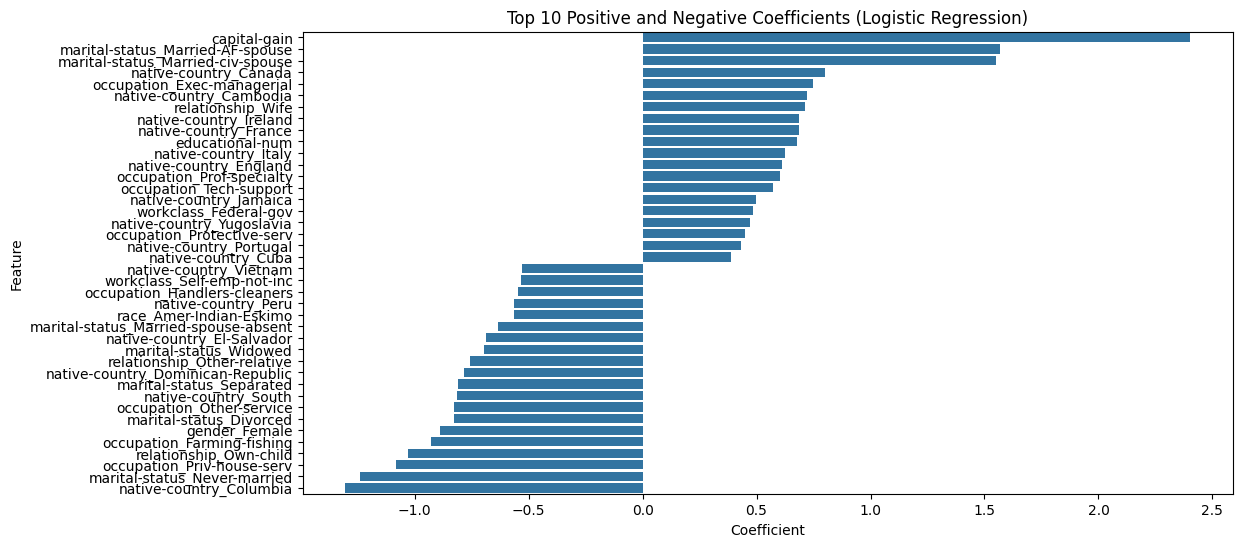

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

top_positive = coefficients.head(20)
top_negative = coefficients.tail(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=pd.concat([top_positive, top_negative]))
plt.title("Top 10 Positive and Negative Coefficients (Logistic Regression)")
plt.show()

In [43]:
for column in df.columns:
    print(column)

age
fnlwgt
educational-num
capital-gain
capital-loss
hours-per-week
income
workclass_?
workclass_Federal-gov
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_10th
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital-status_Divorced
marital-status_Married-AF-spouse
marital-status_Married-civ-spouse
marital-status_Married-spouse-absent
marital-status_Never-married
marital-status_Separated
marital-status_Widowed
occupation_?
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-

Check coefficients


In [ ]:
gender_column = ['gender_Male', 'gender_Female']  # One-hot encoded gender columns

print("Accuracy by Gender:")
for gender in ["Male", "Female"]:
    group = df[df[gender_column[0]] == 1 if gender == "Male" else df[gender_column[1]] == 1]
    X_group = group.drop(columns=["income"])
    y_group = group["income"]
    
    X_group = X_group[X.columns]
    y_pred_group = model.predict(X_group)
    accuracy_group = accuracy_score(y_group, y_pred_group)
    print(f"Accuracy for gender {gender}: {accuracy_group}")


Accuracy by Gender:
Accuracy for gender Male: 0.3037672281776417
Accuracy for gender Female: 0.10925148221343874


In [45]:
gender_column

['gender_Male', 'gender_Female']

In [ ]:
sensitive_columns = ['gender_Male', 'gender_Female']
sensitive_features_test = df[sensitive_columns].iloc[X_test.index]

metric_frame = MetricFrame(
    metrics={"accuracy": accuracy_score,
             "false_positive_rate": false_positive_rate,
             "false_negative_rate": false_negative_rate},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_features_test
)

print("Bias Metrics by Gender using Fairlearn:")
print(metric_frame)

print("\nFalse Positive Rate by Gender:")
print(metric_frame.by_group["false_positive_rate"])

print("\nFalse Negative Rate by Gender:")
print(metric_frame.by_group["false_negative_rate"])

Bias Metrics by Gender using Fairlearn:

False Positive Rate by Gender:
gender_Male  gender_Female
False        False                 NaN
             True             0.018408
True         False            0.096123
             True                  NaN
Name: false_positive_rate, dtype: float64

False Negative Rate by Gender:
gender_Male  gender_Female
False        False                 NaN
             True             0.479208
True         False            0.379074
             True                  NaN
Name: false_negative_rate, dtype: float64


In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(34189, 6)
(14653, 6)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(34189,)
(14653,)


In [ ]:
print(X_train_scaled.shape[0] == y_train.shape[0])
print(X_test_scaled.shape[0] == y_test.shape[0])


True
True


In [63]:
predictions_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'gender_Male': sensitive_features_test['gender_Male'],
    'gender_Female': sensitive_features_test['gender_Female']
})

Predicted probabilities for each gender

In [ ]:
for gender in ['gender_Male', 'gender_Female']:
    gender_group = predictions_df[predictions_df[gender] == 1]
    tp = ((gender_group['y_true'] == 1) & (gender_group['y_pred'] == 1)).sum()
    fp = ((gender_group['y_true'] == 0) & (gender_group['y_pred'] == 1)).sum()
    tn = ((gender_group['y_true'] == 0) & (gender_group['y_pred'] == 0)).sum()
    fn = ((gender_group['y_true'] == 1) & (gender_group['y_pred'] == 0)).sum()
    
    print(f"\nPerformance Metrics for {gender}:")
    print(f"True Positives: {tp}")
    print(f"False Positives: {fp}")
    print(f"True Negatives: {tn}")
    print(f"False Negatives: {fn}")



Performance Metrics for gender_Male:
True Positives: 1810
False Positives: 662
True Negatives: 6225
False Negatives: 1105

Performance Metrics for gender_Female:
True Positives: 263
False Positives: 80
True Negatives: 4266
False Negatives: 242


Performance metrics for each gender


In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

predictions_df['y_pred_prob'] = y_pred_prob


for gender in ['gender_Male', 'gender_Female']:
    print(f"\nPredicted Probabilities for {gender}:")
    
    gender_group = predictions_df[predictions_df[gender] == 1]
    
    print(gender_group[['y_true', 'y_pred', 'y_pred_prob']].head())


Predicted Probabilities for gender_Male:
       y_true  y_pred  y_pred_prob
23881       0       0     0.085608
28911       0       0     0.189791
28188       0       0     0.072148
40834       0       0     0.009142
1276        0       0     0.193147

Predicted Probabilities for gender_Female:
       y_true  y_pred  y_pred_prob
7762        0       0     0.013429
30507       1       1     0.938742
19484       0       1     0.593601
43031       0       0     0.008537
12761       1       1     0.850021


All as one

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from fairlearn.metrics import MetricFrame, false_positive_rate, false_negative_rate

# Read data
df = pd.read_csv('adult.csv')
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

X = df.drop("income", axis=1)
y = df["income"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a model pipeline (Preprocessing + Logistic Regression)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = model_pipeline.predict(X_test)
y_pred_prob = model_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate bias metrics using Fairlearn
sensitive_columns = ['gender_Male', 'gender_Female']
sensitive_features_test = X_test[sensitive_columns]  # Ensure sensitive features align with X_test

metric_frame = MetricFrame(
    metrics={"accuracy": accuracy_score,
             "false_positive_rate": false_positive_rate,
             "false_negative_rate": false_negative_rate},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_features_test
)

print("\nBias Metrics by Gender using Fairlearn:")
print(metric_frame)

# Calculate performance metrics for each gender group
predictions_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'gender_Male': sensitive_features_test['gender_Male'],
    'gender_Female': sensitive_features_test['gender_Female']
})

# Performance metrics by gender
for gender in ['gender_Male', 'gender_Female']:
    gender_group = predictions_df[predictions_df[gender] == 1]
    tp = ((gender_group['y_true'] == 1) & (gender_group['y_pred'] == 1)).sum()
    fp = ((gender_group['y_true'] == 0) & (gender_group['y_pred'] == 1)).sum()
    tn = ((gender_group['y_true'] == 0) & (gender_group['y_pred'] == 0)).sum()
    fn = ((gender_group['y_true'] == 1) & (gender_group['y_pred'] == 0)).sum()

    print(f"\nPerformance Metrics for {gender}:")
    print(f"True Positives: {tp}")
    print(f"False Positives: {fp}")
    print(f"True Negatives: {tn}")
    print(f"False Negatives: {fn}")

# Display predicted probabilities for each gender group
predictions_df['y_pred_prob'] = y_pred_prob
for gender in ['gender_Male', 'gender_Female']:
    print(f"\nPredicted Probabilities for {gender}:")
    gender_group = predictions_df[predictions_df[gender] == 1]
    print(gender_group[['y_true', 'y_pred', 'y_pred_prob']].head())
